A física estatística, em particular a teoria cinética dos gases, fornece uma estrutura útil para descrever a complexidade das interações de mercado. Como um sistema físico composto de muitas partículas trocando energia via colisões binárias, os Modelos de Troca de Cinética consideram um conjunto de agentes econômicos interagentes que trocam de forma binária uma quantidade conservada chamado de riqueza.

Assim, seja um sistema com $N$ agents, onde o agente $i$ é caracterizado pela riqueza $w_i(t)$ no tempo $t$. De modo geral, podemos assumir que inicialmente todos os agentes têm riqueza unitária.

In [44]:
import numpy as np

N = 1000
W = np.ones(N)

A dinâmica ocorre via repetidas trocas binárias entre agentes selecionados aleatoriamente. Assim, selecionados aleatoriamente os agentes $i$ e $j$, temos

$$w_i(t+1) = w_i(t) + \Delta ; w_j(t+1) = w_j(t) - \Delta w.$$

Esse processo (seleção aletatória + troca) é repetido $T = nN$ vezes, onde $n$ é o número de Passos Monte Carlo. A principal diferença entre os modelos é a regra que determina quantidade trocada $\Delta w$. Algumas dos principais reagras são:

$\rightarrow$ regra do perdedor: $\Delta w = \alpha w_j(t)$, onde $\alpha$ pode ser uma valor constante ou aleatório

$\rightarrow$ regra do mínimo: $\Delta w = \alpha \min [w_i(t), w_j(t)]$, onde $\alpha$ pode ser uma valor constante ou aleatório

A ideia é acompanhar a evolução da desigualdade. Para isso, vamos medir o índice gini ($G$) a cada Passo Monte Carlo, que é definido por

In [53]:
def gini(W):
    N = len(W)
    I = 2 * np.arange(1, N + 1) - N - 1
    return np.sum(I *  np.sort(W)) / (N * np.sum(W))

Assim, finalmente, podemos ver um exemplo: regra do perdedor com $\alpha = 0.5$ 

In [60]:
import numpy as np

'''parametros'''

N     = 1000
n     = 100
alpha = 0.3

'''microestado'''

W = np.ones(N)

'''macroestado'''

G = np.zeros(n)

for t in range(n * N):
    
    i = np.random.randint(N)
    j = np.random.randint(N)
    
    delta_w = alpha * W[j]
    
    W[i] = W[i] + delta_w
    W[j] = W[j] - delta_w
    
    if(t % N == 0): G[t // N] = gini(W)


Agora, podemos plotar a evolução temporal do gini, verificando que ele se estabizou no valor $G \approx 0.5$. Aletrando o valor de $\alpha$ no código, é possível verificar os deferentes valores de gini no equilíbrio para os diferentes valores de $\alpha$.

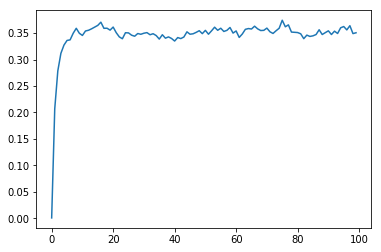

In [61]:
import matplotlib.pyplot as plt

plt.plot(G)
plt.show()

Vamos olhar agora pra regra do mínimo, também com $\alpha = 0.5$.

In [65]:
import numpy as np

'''parametros'''

N     = 1000
n     = 100
alpha = 0.5

'''microestado'''

W = np.ones(N)

'''macroestado'''

G = np.zeros(n)

for t in range(n * N):
    
    i = np.random.randint(N)
    j = np.random.randint(N)
    
    delta_w = alpha * min(W[i], W[j])
    
    W[i] = W[i] + delta_w
    W[j] = W[j] - delta_w
    
    if(t % N == 0): G[t // N] = gini(W)


Plotando a evolução temporal do gini, verificamos que ele se aproxima cada vezmais de $G \approx 1$, a máxima desigualdade possível. Alterando o valor de $\alpha$ no código, é possível verificar que isso ocorre para todos os valores de $\alpha$. 

Esse é um importante resultado, em que o estado final é a condensação (toda riqueza em um agente)

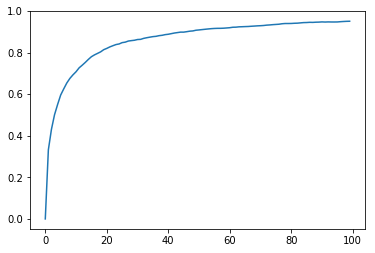

In [66]:
import matplotlib.pyplot as plt

plt.plot(G)
plt.show()